##Clustering

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### K-Means Clustering

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

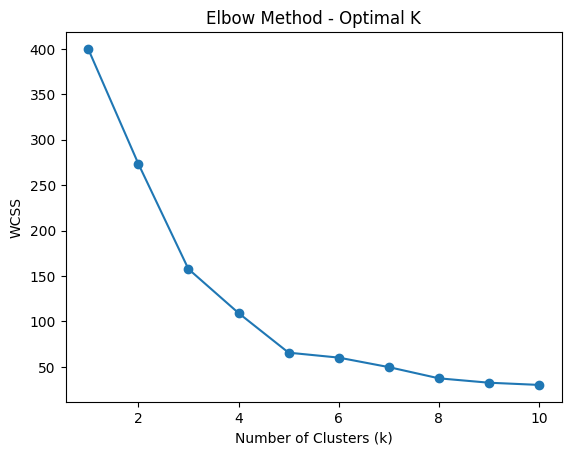

In [13]:
wcss = []  # a list to store WCSS (withing cluster sum of squares) values for each k

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

In [16]:
df['Cluster'] = cluster_labels

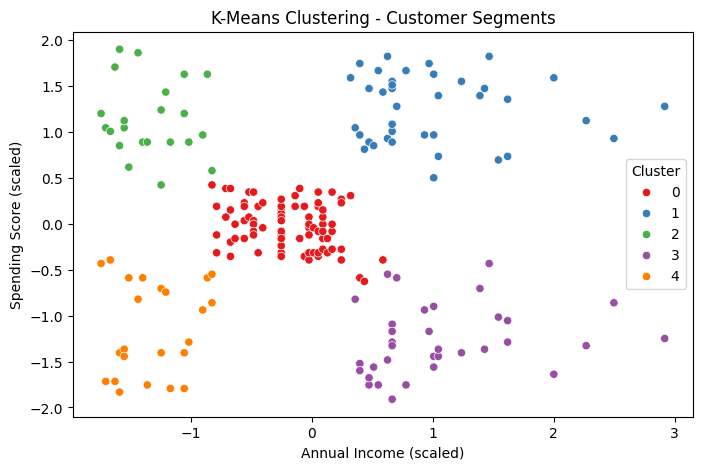

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Cluster'], palette='Set1')
plt.title('K-Means Clustering - Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

### K-Median Clustering

In [24]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.1 MB/s eta 0:00:00


In [ ]:
!pip install numpy==1.23.5
!pip install scikit-learn-extra

In [1]:
from sklearn_extra.cluster import KMedoids

In [10]:
kmedians = KMedoids(n_clusters=5, metric='manhattan', random_state=42, method='pam')
cluster_labels = kmedians.fit_predict(X_scaled)

In [11]:
df['KMedian_Cluster'] = cluster_labels

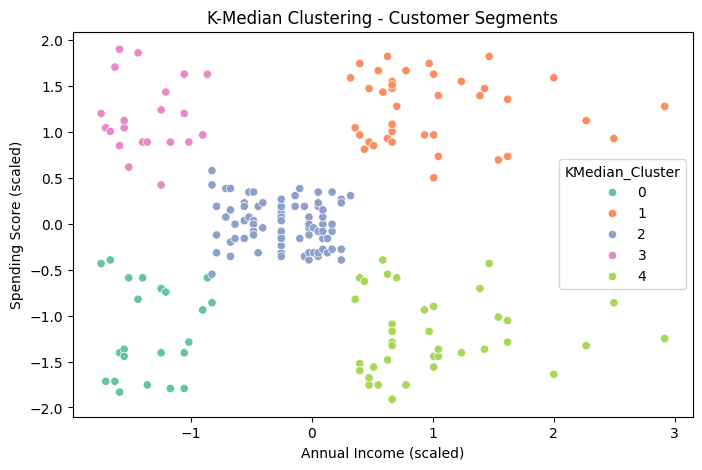

In [12]:
#visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['KMedian_Cluster'], palette='Set2')
plt.title('K-Median Clustering - Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

### Hierarchical Clustering

#### 1. Agglomerative Clustering

In [15]:
# using scipy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

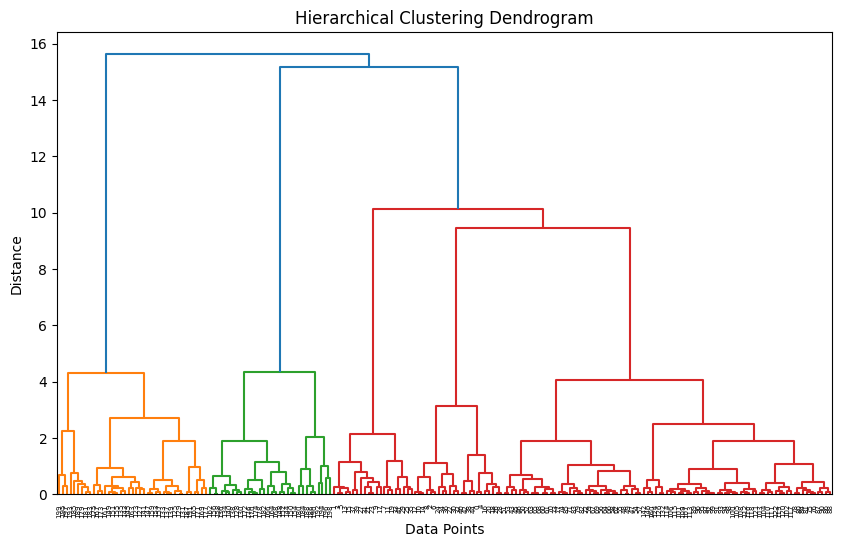

In [16]:
# method='ward' is used to minimize variance within clusters
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [17]:
cluster_labels = fcluster(linked, 5, criterion='maxclust')

In [18]:
df['Hierarchical_Cluster'] = cluster_labels

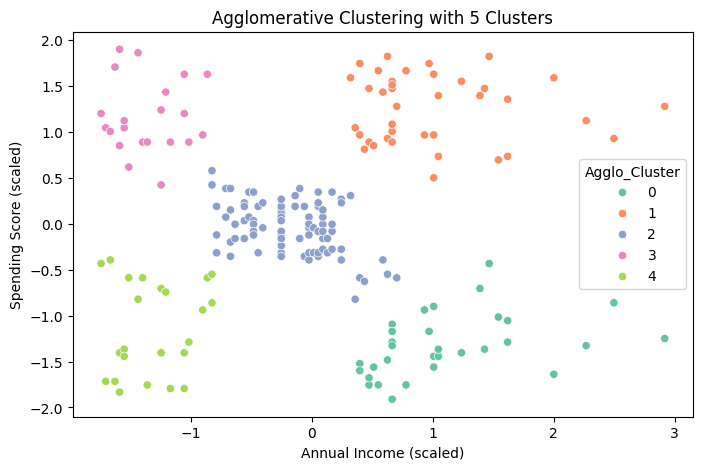

In [13]:
# using sklearn

from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have already scaled data in X_scaled

agglo = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster_labels = agglo.fit_predict(X_scaled)

df['Agglo_Cluster'] = cluster_labels

# Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Agglo_Cluster'], palette='Set2')
plt.title('Agglomerative Clustering with 5 Clusters')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()


#### 2. Divisive Clustering

It is not implemented in python libraries because of being expensive. However we can manually code it using a recursive Kmeans Clustering function.

In [19]:
def divisive_clustering(data, depth=0, max_depth=2):
    """
    Recursively splits data using KMeans with k=2 until max_depth is reached.
    """
    if depth == max_depth or len(data) <= 2:
        return [data]

    kmeans = KMeans(n_clusters=2, random_state=42)
    labels = kmeans.fit_predict(data)

    left_cluster = data[labels == 0]
    right_cluster = data[labels == 1]

    clusters = []
    clusters += divisive_clustering(left_cluster, depth+1, max_depth)
    clusters += divisive_clustering(right_cluster, depth+1, max_depth)

    return clusters


In [21]:
clusters = divisive_clustering(X_scaled, max_depth=2)

# visualizing the clusters
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

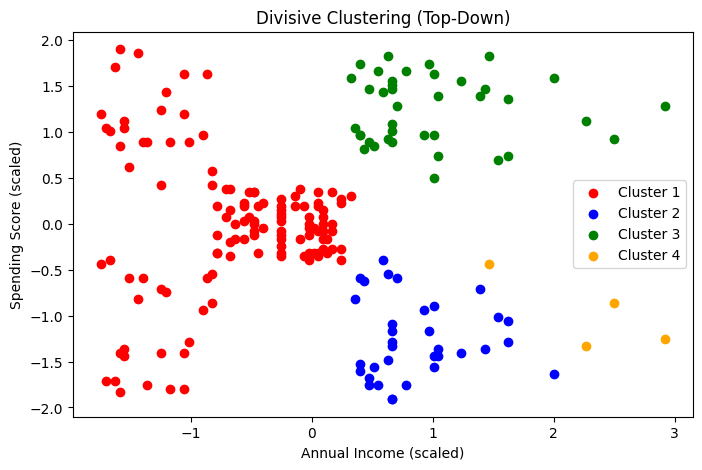

In [22]:
plt.figure(figsize=(8, 5))
for i, cluster in enumerate(clusters):
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i+1}', color=colors[i])

plt.title('Divisive Clustering (Top-Down)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()